## **SETUP**

In [ ]:
import zipfile
import os
from google.colab import drive
from tqdm import tqdm

drive.mount('/content/drive')

Mounted at /content/drive


## **UNZIP DATASET**

In [ ]:
ZIP_FILE_PATH = '/content/drive/MyDrive/sport_pose_estimation/data/mm-fit.zip'
EXTRACT_PATH = '/content/drive/MyDrive/sport_pose_estimation/data/mm-fit'

def extract_zip_with_progress(zip_path, extract_to):

    if not os.path.exists(zip_path):
        print(f"[ERROR] File not found: {zip_path}")
        print("Please verify the file path and try again.")
        return

    if not os.path.exists(extract_to):
        print(f"[INFO] Creating directory: {extract_to}")
        os.makedirs(extract_to)
    else:
        print(f"[INFO] Directory already exists: {extract_to}")

    print(f"[INFO] Starting extraction of '{zip_path}' to '{extract_to}'...")

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            file_list = zip_ref.infolist()

            for member in tqdm(file_list, desc="Extracting", unit="file"):
                try:
                    zip_ref.extract(member, extract_to)
                except zipfile.error as e:
                    print(f"\n[WARNING] Failed to extract {member.filename}: {e}")

        print(f"\n[SUCCESS] Extraction complete. Files are located at: {extract_to}")

        extracted_files = os.listdir(extract_to)
        print(f"[INFO] Content preview of target directory ({len(extracted_files)} items found):")
        print(extracted_files[:5])

    except zipfile.BadZipFile:
        print("[CRITICAL ERROR] The file is a corrupted zip archive.")
    except Exception as e:
        print(f"[CRITICAL ERROR] An unexpected error occurred: {e}")

if __name__ == "__main__":
    extract_zip_with_progress(ZIP_FILE_PATH, EXTRACT_PATH)

NameError: name 'os' is not defined

## **INSPECT DATASET**

In [ ]:
import os

def custom_tree(startpath, max_depth=3, max_files_view=5):
    startpath = startpath.rstrip(os.sep)
    num_sep_start = startpath.count(os.sep)

    print(f" {os.path.basename(startpath)}/")

    for root, dirs, files in os.walk(startpath):
        num_sep = root.count(os.sep)
        depth = num_sep - num_sep_start

        if depth >= max_depth:
            del dirs[:]
            continue

        dirs.sort()
        files.sort()

        indent = "│   " * depth

        if depth > 0:
            folder_name = os.path.basename(root)
            print(f"{indent}├──  {folder_name}/")

        sub_indent = "│   " * (depth + 1)

        display_files = files[:max_files_view]
        remaining_count = len(files) - max_files_view

        for i, f in enumerate(display_files):
            is_last_item = (i == len(display_files) - 1) and (remaining_count <= 0)

            branch = "└──" if is_last_item else "├──"
            print(f"{sub_indent}{branch}  {f}")

        if remaining_count > 0:
            print(f"{sub_indent}└── ... ({remaining_count} dosya daha gizlendi)")

In [ ]:
dataset_path = "/content/drive/MyDrive/sport_pose_estimation/data/mm-fit/mm-fit"

if os.path.exists(dataset_path):
    print(f"Hedef taranıyor: {dataset_path}\n")
    custom_tree(dataset_path, max_depth=30, max_files_view=20)
else:
    print("Hata: Belirtilen dizin bulunamadı. Drive bağlantısını veya yolu kontrol edin.")

Hedef taranıyor: /content/drive/MyDrive/sport_pose_estimation/data/mm-fit/mm-fit

📂 mm-fit/
│   ├── 📁 w00/
│   │   ├── 📄 w00_eb_l_acc.npy
│   │   ├── 📄 w00_eb_l_gyr.npy
│   │   ├── 📄 w00_labels.csv
│   │   ├── 📄 w00_pose_2d.npy
│   │   ├── 📄 w00_pose_3d.npy
│   │   ├── 📄 w00_sp_r_acc.npy
│   │   ├── 📄 w00_sp_r_gyr.npy
│   │   ├── 📄 w00_sp_r_mag.npy
│   │   ├── 📄 w00_sw_l_acc.npy
│   │   ├── 📄 w00_sw_l_gyr.npy
│   │   ├── 📄 w00_sw_l_hr.npy
│   │   ├── 📄 w00_sw_r_acc.npy
│   │   ├── 📄 w00_sw_r_gyr.npy
│   │   └── 📄 w00_sw_r_hr.npy
│   ├── 📁 w01/
│   │   ├── 📄 w01_eb_l_acc.npy
│   │   ├── 📄 w01_eb_l_gyr.npy
│   │   ├── 📄 w01_labels.csv
│   │   ├── 📄 w01_pose_2d.npy
│   │   ├── 📄 w01_pose_3d.npy
│   │   ├── 📄 w01_sp_r_acc.npy
│   │   ├── 📄 w01_sp_r_gyr.npy
│   │   ├── 📄 w01_sp_r_mag.npy
│   │   ├── 📄 w01_sw_l_acc.npy
│   │   ├── 📄 w01_sw_l_gyr.npy
│   │   ├── 📄 w01_sw_l_hr.npy
│   │   ├── 📄 w01_sw_r_acc.npy
│   │   ├── 📄 w01_sw_r_gyr.npy
│   │   └── 📄 w01_sw_r_hr.npy
│   ├── 📁 w02/
│   │  

In [ ]:
import numpy as np
import pandas as pd
import os

def check_pose_data(subject_id, base_path):
    pose_3d_path = os.path.join(base_path, subject_id, f"{subject_id}_pose_3d.npy")
    labels_path = os.path.join(base_path, subject_id, f"{subject_id}_labels.csv")

    if os.path.exists(pose_3d_path):
        data_3d = np.load(pose_3d_path)
        labels = pd.read_csv(labels_path)

        print(f"--- {subject_id} Analizi ---")
        print(f"3D Pose Boyutu: {data_3d.shape} -> (Kare, Eklem, Koordinat)")
        print(f"Etiket Sayısı: {len(labels)}")
        print(f"Egzersiz Türleri: {labels['activity'].unique() if 'activity' in labels.columns else 'Sütun kontrolü gerekli'}")

        return data_3d
    return None

sample_data = check_pose_data("w00", dataset_path)

--- w00 Analizi ---
3D Pose Boyutu: (3, 63918, 18) -> (Kare, Eklem, Koordinat)
Etiket Sayısı: 29
Egzersiz Türleri: Sütun kontrolü gerekli


In [ ]:
import csv

def load_labels(filepath):

    labels = []
    with open(filepath, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for line in reader:
            labels.append([int(line[0]), int(line[1]), int(line[2]), line[3]])
    return labels

In [ ]:
labels = load_labels(os.path.join(dataset_path, "w00/w00_labels.csv"))
print(f"İlk 5 etiket örneği (Başlangıç, Bitiş, Tekrar, Aktivite): \n{labels[:5]}")

İlk 5 etiket örneği (Başlangıç, Bitiş, Tekrar, Aktivite): 
[[4040, 4500, 10, 'squats'], [5435, 5928, 10, 'squats'], [7200, 7685, 10, 'squats'], [8770, 9197, 11, 'pushups'], [11160, 11586, 10, 'pushups']]


In [ ]:
from collections import Counter

labels = load_labels(os.path.join(dataset_path, "w00/w00_labels.csv"))

activity_names = [label[3] for label in labels]
activity_counts = Counter(activity_names)

print(f"{'Aktivite Türü':<30} | {'Set Sayısı':<12} | {'Toplam Kare'}")
print("-" * 60)

for act, count in activity_counts.items():
    total_frames = sum([int(l[1]) - int(l[0]) for l in labels if l[3] == act])
    print(f"{act:<30} | {count:<12} | {total_frames}")

print(f"\nToplam Benzersiz Hareket Türü: {len(activity_counts)}")

Aktivite Türü                  | Set Sayısı   | Toplam Kare
------------------------------------------------------------
squats                         | 3            | 1438
pushups                        | 3            | 1233
dumbbell_shoulder_press        | 3            | 1494
lunges                         | 3            | 2557
dumbbell_rows                  | 3            | 1480
situps                         | 3            | 1753
tricep_extensions              | 3            | 1041
bicep_curls                    | 3            | 1427
lateral_shoulder_raises        | 3            | 1269
jumping_jacks                  | 3            | 831

Toplam Benzersiz Hareket Türü: 10


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_pose(pose, elev=0, azim=0, figsize=(8, 8)):

    if pose.shape[0] == 3:
        vals = pose.T
    else:
        vals = pose

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev, azim)

    limbs = [(0, 1), (1, 2), (2, 3), (0, 4), (4, 5), (5, 6), (0, 7), (7, 8),
             (8, 9), (9, 10), (8, 11), (11, 12), (12, 13), (8, 14), (14, 15), (15, 16)]

    left_right_limb = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

    for i, limb in enumerate(limbs):
        x, y, z = [np.array([vals[limb[0], j], vals[limb[1], j]]) for j in range(3)]
        cc = 'red' if left_right_limb[i] == 1 else 'blue'
        ax.plot(x, y, z, marker='o', markersize=2, lw=1, c=cc)

    radius = 650
    xroot, yroot, zroot = vals[0, 0], vals[0, 1], vals[0, 2]
    ax.set_xlim3d([-radius + xroot, radius + xroot])
    ax.set_ylim3d([-radius + yroot, radius + yroot])
    ax.set_zlim3d([-radius + zroot, radius + zroot])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    pane_color = (1.0, 1.0, 1.0, 0.0)
    ax.xaxis.set_pane_color(pane_color)
    ax.yaxis.set_pane_color(pane_color)
    ax.zaxis.set_pane_color(pane_color)

    plt.show()

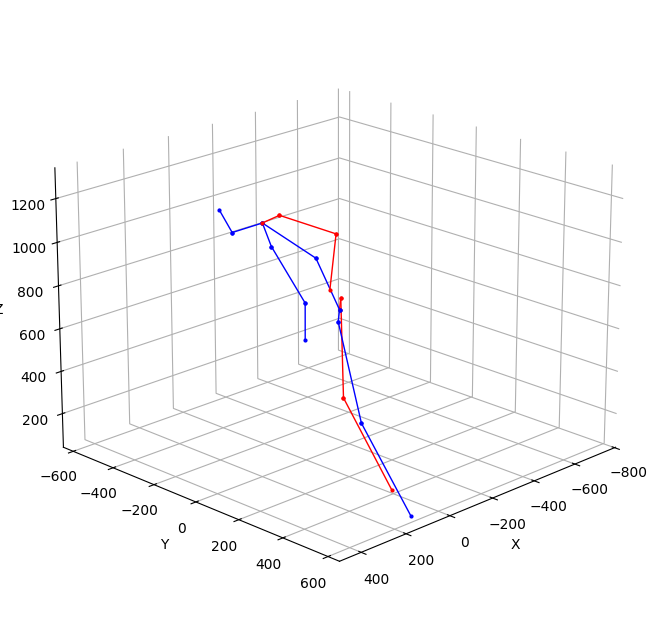

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_3d = np.load(os.path.join(dataset_path, "w00/w00_pose_3d.npy"))

sample_frame_idx = 4270
sample_pose = data_3d[:, sample_frame_idx, 1:]

plot_3d_pose(sample_pose, elev=20, azim=45)

## **FEATURE EXTRACT**

In [ ]:
import numpy as np
import os
import csv
import torch
from tqdm import tqdm
from scipy.signal import resample_poly
from fractions import Fraction

In [ ]:
def load_labels(filepath):
    labels = []
    with open(filepath, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for line in reader:
            labels.append([int(line[0]), int(line[1]), int(line[2]), line[3]])
    return labels

In [ ]:
def align_to_camera(pose_frame):
    l_hip, r_hip = pose_frame[4], pose_frame[1]
    dx, dz = r_hip[0] - l_hip[0], r_hip[2] - l_hip[2]
    rotation_angle = -np.arctan2(dz, dx)
    c, s = np.cos(rotation_angle), np.sin(rotation_angle)
    R = np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])
    return np.dot(pose_frame, R.T)

In [ ]:
def calculate_3d_angle(a, b, c):
    ba = a - b
    bc = c - b
    norm_ba = np.linalg.norm(ba)
    norm_bc = np.linalg.norm(bc)

    if norm_ba == 0 or norm_bc == 0:
        return 0.0

    cosine_angle = np.dot(ba, bc) / (norm_ba * norm_bc + 1e-6)
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

In [ ]:
def get_combined_features(pose_frame):

    pose = align_to_camera(pose_frame)

    pose = pose - pose[0]

    torso_dist = np.linalg.norm(pose[8] - pose[0]) + 1e-6
    normalized_pose = pose / torso_dist

    coords_feat = normalized_pose.flatten()

    p = normalized_pose
    angles = [
        calculate_3d_angle(p[1], p[2], p[3]),   # Sağ Diz
        calculate_3d_angle(p[4], p[5], p[6]),   # Sol Diz
        calculate_3d_angle(p[0], p[1], p[2]),   # Sağ Kalça
        calculate_3d_angle(p[0], p[4], p[5]),   # Sol Kalça
        calculate_3d_angle(p[11], p[12], p[13]),# Sağ Dirsek
        calculate_3d_angle(p[14], p[15], p[16]),# Sol Dirsek
        calculate_3d_angle(p[8], p[11], p[12]), # Sağ Omuz
        calculate_3d_angle(p[8], p[14], p[15]), # Sol Omuz
        calculate_3d_angle(p[7], p[8], p[9]),   # Omurga Eğimi
        calculate_3d_angle(p[1], p[0], p[4])    # Bacak Açıklığı
    ]

    angle_feat = np.array(angles) / 180.0

    return np.concatenate([coords_feat, angle_feat])

In [ ]:
class Resampler:
    def __init__(self, target_length): self.target_length = target_length
    def __call__(self, sample):
        cur_len = sample.shape[0]
        if cur_len == self.target_length: return sample
        frac = Fraction(self.target_length / cur_len).limit_denominator(100)
        return resample_poly(sample, frac.numerator, frac.denominator, axis=0)[:self.target_length, :]

In [ ]:
class MMFitPreprocessor:
    def __init__(self, dataset_path, window_size=90, stride=30):
        self.dataset_path = dataset_path
        self.window_size = window_size
        self.stride = stride
        self.resampler = Resampler(target_length=window_size)
        self.ACTIONS = {
            'squats': 0, 'lunges': 1, 'bicep_curls': 2, 'situps': 3, 'pushups': 4,
            'tricep_extensions': 5, 'dumbbell_rows': 6, 'jumping_jacks': 7,
            'dumbbell_shoulder_press': 8, 'lateral_shoulder_raises': 9
        }

    def process_subject(self, sub_id):
        sub_path = os.path.join(self.dataset_path, sub_id)
        data_3d_path = os.path.join(sub_path, f"{sub_id}_pose_3d.npy")
        label_path = os.path.join(sub_path, f"{sub_id}_labels.csv")

        if not os.path.exists(data_3d_path) or not os.path.exists(label_path):
            return [], []

        data_3d = np.load(data_3d_path)
        with open(label_path, 'r') as f:
            reader = csv.reader(f)
            labels = list(reader)

        pose_data = data_3d[:, :, 1:].transpose(1, 2, 0)
        total_frames = pose_data.shape[0]
        windows, action_labels = [], []

        for row in labels:
            if len(row) < 4: continue
            start, end, action = int(row[0]), int(row[1]), row[3]
            if action not in self.ACTIONS: continue

            actual_end = min(end, total_frames)

            for i in range(start, actual_end - self.window_size, self.stride):
                raw_win = pose_data[i : i + self.window_size]
                if raw_win.shape[0] == 0: continue

                resampled_win = self.resampler(raw_win)
                window_features = []
                for frame in resampled_win:
                    feat_vec = get_combined_features(frame)
                    window_features.append(feat_vec)

                windows.append(np.array(window_features))
                action_labels.append(self.ACTIONS[action])

        return np.array(windows), np.array(action_labels)

In [ ]:
dataset_root = "/content/drive/MyDrive/sport_pose_estimation/data/mm-fit/mm-fit"
save_path = "/content/drive/MyDrive/sport_pose_estimation/data/mm-fit/processed_individual"
os.makedirs(save_path, exist_ok=True)

preprocessor = MMFitPreprocessor(dataset_root)
subjects = sorted([d for d in os.listdir(dataset_root) if d.startswith('w')])

print(f"ULTIMATE FEATURES (Torso Norm + Angles) ile işleniyor...")
print(f"Beklenen Feature Size: 61")
print(f"Hedef Klasör: {save_path}")
print("-" * 60)

count = 0
for sub in tqdm(subjects, desc="Oturumlar İşleniyor"):
    x, y = preprocessor.process_subject(sub)
    if len(x) > 0:
        file_path = os.path.join(save_path, f"{sub}.pt")
        torch.save({'x': torch.tensor(x, dtype=torch.float32), 'y': torch.tensor(y, dtype=torch.long)}, file_path)
        count += 1

print("-" * 60)
print(f"İşlem Tamamlandı! {count} dosya güncellendi.")

ULTIMATE FEATURES (Torso Norm + Angles) ile işleniyor...
Beklenen Feature Size: 61
Hedef Klasör: /content/drive/MyDrive/sport_pose_estimation/data/mm-fit/processed_individual
------------------------------------------------------------


Oturumlar İşleniyor: 100%|██████████| 21/21 [04:43<00:00, 13.49s/it]

------------------------------------------------------------
İşlem Tamamlandı! 21 dosya güncellendi.
